# Manuscript Figure 1: A Zoology of Dimensionality Reduction Outcomes

In this notebook I want to re-do the code for the first figure in the paper.  As a reminder, this was a Figure that showed how processing the Tabula Muris Marrow data using different algorithms and hyperparameters results in different qualitative features.  Specifically, it was a 2x2 figure showing two t-SNE and two UMAP embeddings, each at $k=15$ and $k=400$.

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
# import PaperV4_PlottingScripts.plotting_utility as pUtl
import pandas as pd
import scanpy as sc
import seaborn as sns
from sklearn.metrics import pairwise_distances as pwd
import warnings

%matplotlib inline

warnings.filterwarnings("ignore", message="This figure includes Axes that")
warnings.filterwarnings("ignore", message="tight_layout not applied: ")

### Set runtime parameters here...

In [2]:
## Set the figure base name
name_base = "EMBEDRFigure_01v1_DimRedZoology"

## Select which data to use
seq_type = "FACS"
tissue = "Marrow"

## Set parameters at which to plot data
DR_params = [('tSNE', 7),
             ('UMAP', 15),
             ('tSNE', 250),
             ('UMAP', 400)]

## Set other parameters
n_components   = 2

tSNE_exag_iter = 250
tSNE_n_iter    = 1000 - tSNE_exag_iter

random_seed    = 1
initialization = 'random'
n_jobs         = -1

## Data directory
data_dir = f"../../data/tabula-muris/"

## Figure directory
fig_dir = f"./"

## Runtime flags
show_all_axes = False         ## Show ALL axes borders (useful for gridspec setup)
color_by_cluster = True       ## Color plot by cell type cluster annotations.
color_by_variability = False  ## Color plot by kEff / dist to NN

### Load the data and metadata

In [10]:
data = sc.read_h5ad(os.path.join(data_dir, f"04_facs_processed_data/{seq_type}/Processed_{tissue.title()}.h5ad"))
data.obs.head()

X = data.obsm['X_pca']
n_samples, n_features = X.shape
print(f"Input data `X` is {n_samples} x {n_features}!")

Input data `X` is 4771 x 50!


### Set Figure Parameters

In [ ]:
## Environment-wide parameters.
plt.rcParams['svg.fonttype'] = 'none'
sns.set(color_codes=True)
sns.set_style('whitegrid')
matplotlib.rc("font", size=10)
matplotlib.rc("xtick", labelsize=10)
matplotlib.rc("ytick", labelsize=10)
matplotlib.rc("axes", labelsize=12)
matplotlib.rc("axes", titlesize=16)
matplotlib.rc("legend", fontsize=10)
matplotlib.rc("figure", titlesize=12)

## Figure size and gridspec size
my_dpi = 400
fig_wid = 7.2  ## inches (8 inch-wide paper minus margins)
fig_hgt = 0.8 * fig_wid

## Automatically set n_rows based on conditions and n_cols.
n_cols = 2
n_rows = int(np.ceil(len(DR_params) / n_cols))

## Main gridspec parameters.
if color_by_cluster:  ## We need less space if coloring by cluster.
    main_wspace    = 0.005
    fig_pad        = 0.5
else:
    main_wspace    = 0.15
    fig_pad        = 3
main_hspace        = 0.01
main_spns_2_show   = 'all'
main_spn_alpha     = 0.5
main_spn_width     = 1.0
main_height_ratios = [1, 1]

## Toggle for axes borders.
if show_all_axes:
    spine_alpha = 1
else:
    spine_alpha = 0

In [19]:
import EMBEDR

In [32]:
import EMBEDR.plots.EMBEDR_Figure_01v1_DimRed_Zoology as F01

In [52]:
%run ../../EMBEDR/plots/EMBEDR_Figure_01v1_DimRed_Zoology.py




	Generating EMBEDR Figure 01v1 (Dim. Red. Zoology)





In [54]:
# cell_ont_meta
# cell_ont_ids
cell_ont_counts

cell_ontology_class
B cell                                          44
Slamf1-negative multipotent progenitor cell    713
Slamf1-positive multipotent progenitor cell    134
basophil                                        25
common lymphoid progenitor                     156
granulocyte                                    761
granulocyte monocyte progenitor cell           134
granulocytopoietic cell                        221
hematopoietic precursor cell                   265
immature B cell                                344
immature NK T cell                              37
immature T cell                                 60
immature natural killer cell                    36
late pro-B cell                                306
macrophage                                     173
mature natural killer cell                      49
megakaryocyte-erythroid progenitor cell         55
monocyte                                       266
naive B cell                                   692
pre-natural

In [42]:
"../../data/TabulaMuris/FACS/Processed_Marrow.h5ad"

EMBEDR_Figure_01v1_DimRed_Zoology.ipynb
EMBEDR_project/


In [22]:
F01.test_function()

This works?

This works!


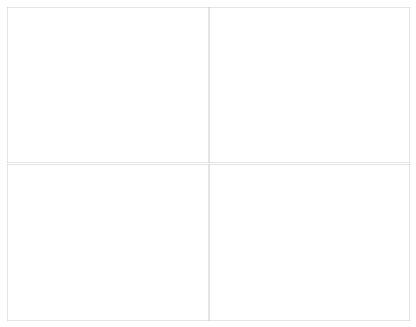

In [37]:
fig, back_axis, main_gs, main_axes = F01.set_main_grid()

In [38]:

F01.make_figure(X, data.obs)

TypeError: make_figure() missing 2 required positional arguments: 'X' and 'cluster_labels'